## 레이더 차트 만들기


### 1. 합쳐진 데이터 불러오기

In [2]:
import pandas as pd
raw_data = pd.read_csv(r"E:\Downloads\combined_data.csv")

### 2. 데이터 기본정보 확인하기
    - 총 데이터는 1727278행 51열이 있음

In [3]:
raw_data.info()
raw_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727278 entries, 0 to 1727277
Data columns (total 47 columns):
 #   Column                Dtype  
---  ------                -----  
 0   MBER_SEQ_NO_VALUE     object 
 1   MESURE_SEQ_NO         int64  
 2   CNTER_NM              object 
 3   AGRDE_FLAG_NM         object 
 4   MESURE_PLACE_FLAG_NM  object 
 5   MESURE_AGE_CO         float64
 6   INPT_FLAG_NM          object 
 7   CRTFC_FLAG_NM         object 
 8   MESURE_DE             int64  
 9   SEXDSTN_FLAG_CD       object 
 10  MESURE_IEM_001_VALUE  float64
 11  MESURE_IEM_002_VALUE  float64
 12  MESURE_IEM_003_VALUE  float64
 13  MESURE_IEM_004_VALUE  float64
 14  MESURE_IEM_005_VALUE  float64
 15  MESURE_IEM_006_VALUE  float64
 16  MESURE_IEM_007_VALUE  float64
 17  MESURE_IEM_008_VALUE  float64
 18  MESURE_IEM_009_VALUE  float64
 19  MESURE_IEM_010_VALUE  float64
 20  MESURE_IEM_012_VALUE  float64
 21  MESURE_IEM_013_VALUE  float64
 22  MESURE_IEM_014_VALUE  float64
 23  MESURE_

,MESURE_SEQ_NO,MESURE_AGE_CO,MESURE_DE,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_003_VALUE,MESURE_IEM_004_VALUE,MESURE_IEM_005_VALUE,MESURE_IEM_006_VALUE,MESURE_IEM_007_VALUE,...,MESURE_IEM_030_VALUE,MESURE_IEM_031_VALUE,MESURE_IEM_032_VALUE,MESURE_IEM_033_VALUE,MESURE_IEM_034_VALUE,MESURE_IEM_035_VALUE,MESURE_IEM_036_VALUE,MESURE_IEM_037_VALUE,MESURE_IEM_040_VALUE,MESURE_IEM_041_VALUE
count,1.727278e+06,1.727271e+06,1.727278e+06,1.727022e+06,1.727044e+06,1.684418e+06,961835.000000,1.716344e+06,1.716331e+06,1.724414e+06,...,893776.000000,84566.000000,83532.000000,83400.000000,28330.000000,83360.000000,267278.000000,267257.000000,175926.000000,29615.000000
mean,1.685218e+00,3.424685e+01,2.018333e+07,1.644485e+02,6.365931e+01,2.664808e+01,79.868808,7.641012e+01,1.246060e+02,2.952428e+01,...,30.695753,84.941147,113.308014,136.425564,151.092164,38.844728,114.241905,39.880124,0.543558,0.722687
std,1.763503e+00,2.202178e+01,2.507970e+04,9.573697e+00,1.348647e+01,1.253280e+01,31.953458,6.079308e+01,7.398774e+01,2.398202e+01,...,42.908613,221.394290,18.414024,305.109143,33.682298,46.088040,31.228407,13.451548,5.388264,8.114909
min,1.000000e+00,0.000000e+00,2.013030e+07,5.000000e+01,1.000000e+01,0.000000e+00,0.000000,0.000000e+00,-8.400000e+01,-9.999000e+03,...,-9181.800000,0.000000,0.000000,0.000000,0.000000,-12106.000000,0.000000,-2347.200000,0.000000,0.000000
25%,1.000000e+00,1.600000e+01,2.017021e+07,1.574000e+02,5.408000e+01,2.000000e+01,73.000000,7.000000e+01,1.160000e+02,2.170000e+01,...,31.600000,75.000000,103.000000,124.000000,140.000000,34.200000,98.000000,35.400000,0.321000,0.427000
50%,1.000000e+00,2.300000e+01,2.018102e+07,1.642000e+02,6.198000e+01,2.680000e+01,79.900000,7.700000e+01,1.220000e+02,2.760000e+01,...,37.100000,82.000000,113.000000,134.000000,155.000000,38.300000,113.000000,39.700000,0.355000,0.501000
75%,2.000000e+00,5.400000e+01,2.020112e+07,1.717000e+02,7.160000e+01,3.310000e+01,86.700000,8.200000e+01,1.330000e+02,3.700000e+01,...,43.400000,91.000000,123.000000,146.000000,167.000000,43.600000,129.000000,44.700000,0.395000,0.564000
max,5.700000e+01,1.770000e+02,2.022123e+07,2.100000e+02,1.843000e+02,4.032000e+03,24324.000000,7.515400e+04,8.810100e+04,2.343200e+04,...,345.500000,64107.000000,1891.000000,66665.000000,2209.000000,198.000000,9800.000000,1646.100000,340.000000,605.000000


### 3. 데이터 전처리
#### 3.1 불필요한 행 제거 및 결측치 처리
    - 불필요한 정보인 회원번호, 측정회원번호, 입력구분명, 측정장소구분명은 제거
    - 향후 서비스 이용자가 스스로 측정 불가한 측정항목 제거(3, 4, 5, 6, 7, 8, 10, 14, 15, 16, 17, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41) 
    - data_child 9번 열, data_teen 9번, 13번, 15번 열, data_elder 26번 열을 되살림
    - 기본정보를 토대로 결측치가 많은 측정값은(24) 제거
    - 중요 변수인 나이와 운동처방에 결측이 있는 경우, 해당되는 행 제거
    - 성인데이터 중, 등급이 '금상', '은상', '동상'인 경우 행 제거
    - 성별(남:0, 여:1), 운동등급(1등급:1, 2등급:2, 3등급:3, 참가증:4)로 인코딩

In [4]:
# 회원일련번호값, 측정일련번호, 입력구분명 제거
raw_data.drop(['MBER_SEQ_NO_VALUE', 'MESURE_SEQ_NO', 'MESURE_PLACE_FLAG_NM', 'INPT_FLAG_NM'], axis = 1, inplace=True)

In [5]:
# 향후 서비스 이용자가 이용하지 못하는 측정값 제거
col = []
num = [3, 4, 5, 6, 7, 8, 14, 16, 17, 28, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41]
for i in num:
    if len(str(i))==1:
        dt = 'MESURE_IEM_00' + str(i) + '_VALUE'
        col.append(dt)
    else:
        dt = 'MESURE_IEM_0' + str(i) + '_VALUE'
        col.append(dt)

raw_data.drop(col, axis = 1, inplace=True)

In [6]:
# 나이, 운동처방에 결측이 있는 경우, 행을 제거
raw_data.dropna(subset=['MVM_PRSCRPTN_CN','MESURE_AGE_CO'], inplace=True)

In [7]:
# 성인 데이터 중 등급이 '금상', '은상', 동상'인 행 제거
raw_data.drop(raw_data[(raw_data['CRTFC_FLAG_NM']=='금상') | (raw_data['CRTFC_FLAG_NM']=='동상')].index,inplace=True)


In [8]:
# 결측치 제거 여부 확인하기
print(raw_data['MESURE_AGE_CO'].isnull().sum())
print(raw_data['MVM_PRSCRPTN_CN'].isnull().sum())

0
0


In [9]:
# raw 데이터 결측치 제거 확인
#raw_data.info()
print(raw_data.columns)


Index(['CNTER_NM', 'AGRDE_FLAG_NM', 'MESURE_AGE_CO', 'CRTFC_FLAG_NM',
       'MESURE_DE', 'SEXDSTN_FLAG_CD', 'MESURE_IEM_001_VALUE',
       'MESURE_IEM_002_VALUE', 'MESURE_IEM_009_VALUE', 'MESURE_IEM_010_VALUE',
       'MESURE_IEM_012_VALUE', 'MESURE_IEM_013_VALUE', 'MESURE_IEM_015_VALUE',
       'MESURE_IEM_018_VALUE', 'MESURE_IEM_019_VALUE', 'MESURE_IEM_020_VALUE',
       'MESURE_IEM_021_VALUE', 'MESURE_IEM_022_VALUE', 'MESURE_IEM_023_VALUE',
       'MESURE_IEM_025_VALUE', 'MESURE_IEM_026_VALUE', 'MESURE_IEM_027_VALUE',
       'MVM_PRSCRPTN_CN'],
      dtype='object')


In [10]:
# 성별 인코딩하기
raw_data['SEXDSTN_FLAG_CD'] = raw_data['SEXDSTN_FLAG_CD'].map({'M': 0, 'F': 1})

In [11]:
# 등급표 인코딩하기
raw_data['CRTFC_FLAG_NM'] = raw_data['CRTFC_FLAG_NM'].map({'참가증':4, '3등급':3, '2등급':2, '1등급':1})

#### 3.2 데이터 분할
    - 연령별 특성을 고려한 알고리즘 모델을 학습시키기 위하여, 연령별로 데이터를 분할
    - 데이터를 분할한 뒤, 연령별 측정하지 않는 측정항목은 제거

In [12]:
# 연령별 구분에 따라 유소년(child), 청소년(teen), 성인(adult), 노인(elder)별로 데이터 분리
data_child = raw_data[raw_data['AGRDE_FLAG_NM']=='유소년']
data_teen = raw_data[raw_data['AGRDE_FLAG_NM']=='청소년']
data_adult = raw_data[raw_data['AGRDE_FLAG_NM']=='성인']
data_elder = raw_data[raw_data['AGRDE_FLAG_NM']=='노인']

col = [data_child, data_teen, data_adult, data_elder]

# 각 데이터의 행, 열 개수 확인
for i in col:
    print(f" 행: {i.shape[0]},  열:{i.shape[1]}")

 행: 40305,  열:23
 행: 563269,  열:23
 행: 720676,  열:23
 행: 240028,  열:23


In [13]:
# 유소년 데이터 열 제거
columns_to_drop = ['MESURE_IEM_010_VALUE', 'MESURE_IEM_013_VALUE', 'MESURE_IEM_015_VALUE', 'MESURE_IEM_019_VALUE', 'MESURE_IEM_021_VALUE', 'MESURE_IEM_023_VALUE', 'MESURE_IEM_025_VALUE','MESURE_IEM_026_VALUE','MESURE_IEM_027_VALUE']
data_child.drop(columns=columns_to_drop, inplace=True)
print(data_child.columns)


Index(['CNTER_NM', 'AGRDE_FLAG_NM', 'MESURE_AGE_CO', 'CRTFC_FLAG_NM',
       'MESURE_DE', 'SEXDSTN_FLAG_CD', 'MESURE_IEM_001_VALUE',
       'MESURE_IEM_002_VALUE', 'MESURE_IEM_009_VALUE', 'MESURE_IEM_012_VALUE',
       'MESURE_IEM_018_VALUE', 'MESURE_IEM_020_VALUE', 'MESURE_IEM_022_VALUE',
       'MVM_PRSCRPTN_CN'],
      dtype='object')


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24528\4219449609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_child.drop(columns=columns_to_drop, inplace=True)


In [14]:
# 십 대 데이터 열 제거
columns_to_drop_teen = ['MESURE_IEM_019_VALUE', 'MESURE_IEM_021_VALUE', 'MESURE_IEM_023_VALUE', 'MESURE_IEM_025_VALUE', 'MESURE_IEM_026_VALUE','MESURE_IEM_010_VALUE','MESURE_IEM_027_VALUE']
data_teen.drop(columns=columns_to_drop_teen, inplace=True)
print(data_teen.columns)


Index(['CNTER_NM', 'AGRDE_FLAG_NM', 'MESURE_AGE_CO', 'CRTFC_FLAG_NM',
       'MESURE_DE', 'SEXDSTN_FLAG_CD', 'MESURE_IEM_001_VALUE',
       'MESURE_IEM_002_VALUE', 'MESURE_IEM_009_VALUE', 'MESURE_IEM_012_VALUE',
       'MESURE_IEM_013_VALUE', 'MESURE_IEM_015_VALUE', 'MESURE_IEM_018_VALUE',
       'MESURE_IEM_020_VALUE', 'MESURE_IEM_022_VALUE', 'MVM_PRSCRPTN_CN'],
      dtype='object')


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24528\3771722516.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_teen.drop(columns=columns_to_drop_teen, inplace=True)


In [15]:
# 성인 데이터 열 제거
columns_to_drop_adult = ['MESURE_IEM_023_VALUE', 'MESURE_IEM_025_VALUE', 'MESURE_IEM_026_VALUE','MESURE_IEM_009_VALUE','MESURE_IEM_010_VALUE','MESURE_IEM_013_VALUE','MESURE_IEM_015_VALUE','MESURE_IEM_027_VALUE']
data_adult.drop(columns=columns_to_drop_adult, inplace=True)
print(data_adult.columns)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24528\4221944570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_adult.drop(columns=columns_to_drop_adult, inplace=True)


Index(['CNTER_NM', 'AGRDE_FLAG_NM', 'MESURE_AGE_CO', 'CRTFC_FLAG_NM',
       'MESURE_DE', 'SEXDSTN_FLAG_CD', 'MESURE_IEM_001_VALUE',
       'MESURE_IEM_002_VALUE', 'MESURE_IEM_012_VALUE', 'MESURE_IEM_018_VALUE',
       'MESURE_IEM_019_VALUE', 'MESURE_IEM_020_VALUE', 'MESURE_IEM_021_VALUE',
       'MESURE_IEM_022_VALUE', 'MVM_PRSCRPTN_CN'],
      dtype='object')


In [16]:
# 노인 데이터 열 제거
columns_to_drop_elder = ['MESURE_IEM_009_VALUE', 'MESURE_IEM_010_VALUE', 'MESURE_IEM_013_VALUE', 'MESURE_IEM_015_VALUE', 'MESURE_IEM_019_VALUE', 'MESURE_IEM_020_VALUE', 'MESURE_IEM_021_VALUE', 'MESURE_IEM_022_VALUE']
data_elder.drop(columns=columns_to_drop_elder, inplace=True)
print(data_elder.columns)


Index(['CNTER_NM', 'AGRDE_FLAG_NM', 'MESURE_AGE_CO', 'CRTFC_FLAG_NM',
       'MESURE_DE', 'SEXDSTN_FLAG_CD', 'MESURE_IEM_001_VALUE',
       'MESURE_IEM_002_VALUE', 'MESURE_IEM_012_VALUE', 'MESURE_IEM_018_VALUE',
       'MESURE_IEM_023_VALUE', 'MESURE_IEM_025_VALUE', 'MESURE_IEM_026_VALUE',
       'MESURE_IEM_027_VALUE', 'MVM_PRSCRPTN_CN'],
      dtype='object')


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24528\2713338385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_elder.drop(columns=columns_to_drop_elder, inplace=True)


#### 3.3 연령별 데이터 내 결측치 대체
    - 각 연령 데이터별 최소 데이터의 수를 기준으로 데이터정형화 진행
        - 유소년 기준: MESURE_IEM_020_VALUE
        - 청소년 기준: MESURE_IEM_022_VALUE
        - 성인 기준: MESURE_IEM_020_VALUE
        - 노인 기준: MESURE_IEM_027_VALUE

    - 신장, 체중에 결측이 있는 경우, 평균대체법으로 결측 처리
    - BMI 결측이 있는 경우, 체중/신장(m)**2으로 계산하여 처리
    - 측정항목의 경우, 핫덱 대체법으로 결측 처리

In [17]:
# 핫덱 대체 함수 설정
import numpy as np

def hot_deck(df):
    for column in df.columns:
        na_count = df[column].isnull().sum() 

        if na_count > 0: 

            valid_values = df[column].dropna()
            if len(valid_values) > 0:
                min_val = valid_values.min()
                max_val = valid_values.max()
                # 최솟값과 최댓값이 같은 경우
                if min_val == max_val:
                    df.loc[df[column].isnull(), column] = min_val
                # 랜덤 값 생성 및 대체
                else:
                    random_values = np.random.randint(low=min_val, high=max_val, size=na_count)
                    df.loc[df[column].isnull(), column] = random_values
            else:
                # 모든 값이 결측치인 경우 처리 (예: 열 삭제, 기본값 설정 등)
                pass
    return df


In [18]:
import numpy as np
#유소년(child) 결측치 대체
## 언더샘플링
## 데이터 보존량이 적은 MESURE_IEM_020_VALUE을 기준으로 언더 샘플링
data_child.dropna(subset=['MESURE_IEM_020_VALUE'], inplace=True)

## 신장, 체중에 결측치가 있는 경우, 평균대체로 결측치 처리
col_to_fill = ['MESURE_IEM_001_VALUE', 'MESURE_IEM_002_VALUE']
for col_name in col_to_fill:
    data_child[col_name].fillna(data_child[col_name].mean())

## BMI(18) 계산(체중(kg)/ 신장(m)**2)
data_child['MESURE_IEM_018_VALUE'].fillna(data_child['MESURE_IEM_002_VALUE'] / ((data_child['MESURE_IEM_001_VALUE']/100)**2), inplace=True)

## 측정 데이터에 결측치가 있는 경우, 핫덱 대체로 결측치 처리
data_child = hot_deck(data_child)

# 결측치 확인
data_child.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33513 entries, 1211965 to 1727038
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CNTER_NM              33513 non-null  object 
 1   AGRDE_FLAG_NM         33513 non-null  object 
 2   MESURE_AGE_CO         33513 non-null  float64
 3   CRTFC_FLAG_NM         33513 non-null  int64  
 4   MESURE_DE             33513 non-null  int64  
 5   SEXDSTN_FLAG_CD       33513 non-null  int64  
 6   MESURE_IEM_001_VALUE  33513 non-null  float64
 7   MESURE_IEM_002_VALUE  33513 non-null  float64
 8   MESURE_IEM_009_VALUE  33513 non-null  float64
 9   MESURE_IEM_012_VALUE  33513 non-null  float64
 10  MESURE_IEM_018_VALUE  33513 non-null  float64
 11  MESURE_IEM_020_VALUE  33513 non-null  float64
 12  MESURE_IEM_022_VALUE  33513 non-null  float64
 13  MVM_PRSCRPTN_CN       33513 non-null  object 
dtypes: float64(8), int64(3), object(3)
memory usage: 3.8+ MB


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24528\2814172312.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_child.dropna(subset=['MESURE_IEM_020_VALUE'], inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24528\2814172312.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_child['MESURE_IEM_018_VALUE'].fillna(data_child['MESURE_IEM_002_VALUE'] / ((data_child['MESURE_IEM_001_VALUE']/100)**2), inplace=True)


In [19]:
# 청소년(teen) 결측치 대체
## 언더샘플링
## 데이터 보존량이 적은 MESURE_IEM_022_VALUE을 기준으로 언더 샘플링
data_teen.dropna(subset=['MESURE_IEM_022_VALUE'], inplace=True)

## 신장, 체중에 결측치가 있는 경우, 평균대체로 결측치 처리
col_to_fill = ['MESURE_IEM_001_VALUE', 'MESURE_IEM_002_VALUE']
for col_name in col_to_fill:
    data_teen[col_name].fillna(data_teen[col_name].mean())

## BMI(18) 계산(체중(kg)/ 신장(m)**2)
data_teen['MESURE_IEM_018_VALUE'].fillna(data_teen['MESURE_IEM_002_VALUE'] / ((data_teen['MESURE_IEM_001_VALUE']/100)**2), inplace=True)

## 측정 데이터에 결측치가 있는 경우, 핫덱 대체로 결측치 처리
data_teen = hot_deck(data_teen)

# 결측치 확인
data_teen.info()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24528\2620873156.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_teen.dropna(subset=['MESURE_IEM_022_VALUE'], inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24528\2620873156.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_teen['MESURE_IEM_018_VALUE'].fillna(data_teen['MESURE_IEM_002_VALUE'] / ((data_teen['MESURE_IEM_001_VALUE']/100)**2), inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 235788 entries, 248803 to 1726553
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CNTER_NM              235788 non-null  object 
 1   AGRDE_FLAG_NM         235788 non-null  object 
 2   MESURE_AGE_CO         235788 non-null  float64
 3   CRTFC_FLAG_NM         235788 non-null  int64  
 4   MESURE_DE             235788 non-null  int64  
 5   SEXDSTN_FLAG_CD       235788 non-null  int64  
 6   MESURE_IEM_001_VALUE  235788 non-null  float64
 7   MESURE_IEM_002_VALUE  235788 non-null  float64
 8   MESURE_IEM_009_VALUE  235788 non-null  float64
 9   MESURE_IEM_012_VALUE  235788 non-null  float64
 10  MESURE_IEM_013_VALUE  235788 non-null  float64
 11  MESURE_IEM_015_VALUE  235788 non-null  float64
 12  MESURE_IEM_018_VALUE  235788 non-null  float64
 13  MESURE_IEM_020_VALUE  235788 non-null  float64
 14  MESURE_IEM_022_VALUE  235788 non-null  float64
 15 

In [20]:
# 성인(adult) 결측치 대체
## 언더샘플링
## 데이터 보존량이 적은 MESURE_IEM_020_VALUE을 기준으로 언더 샘플링
data_adult.dropna(subset=['MESURE_IEM_020_VALUE'], inplace=True)

## 신장, 체중에 결측치가 있는 경우, 평균대체로 결측치 처리
col_to_fill = ['MESURE_IEM_001_VALUE', 'MESURE_IEM_002_VALUE']
for col_name in col_to_fill:
    data_adult[col_name].fillna(data_adult[col_name].mean())

## BMI(18) 계산(체중(kg)/ 신장(m)**2)
data_adult['MESURE_IEM_018_VALUE'].fillna(data_adult['MESURE_IEM_002_VALUE'] / ((data_adult['MESURE_IEM_001_VALUE']/100)**2), inplace=True)

## 측정 데이터에 결측치가 있는 경우, 핫덱 대체로 결측치 처리
data_adult = hot_deck(data_adult)

# 결측치 확인
data_adult.info()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24528\907542849.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_adult.dropna(subset=['MESURE_IEM_020_VALUE'], inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24528\907542849.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_adult['MESURE_IEM_018_VALUE'].fillna(data_adult['MESURE_IEM_002_VALUE'] / ((data_adult['MESURE_IEM_001_VALUE']/100)**2), inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 423847 entries, 1 to 1727222
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CNTER_NM              423847 non-null  object 
 1   AGRDE_FLAG_NM         423847 non-null  object 
 2   MESURE_AGE_CO         423847 non-null  float64
 3   CRTFC_FLAG_NM         423847 non-null  int64  
 4   MESURE_DE             423847 non-null  int64  
 5   SEXDSTN_FLAG_CD       423847 non-null  int64  
 6   MESURE_IEM_001_VALUE  423847 non-null  float64
 7   MESURE_IEM_002_VALUE  423847 non-null  float64
 8   MESURE_IEM_012_VALUE  423847 non-null  float64
 9   MESURE_IEM_018_VALUE  423847 non-null  float64
 10  MESURE_IEM_019_VALUE  423847 non-null  float64
 11  MESURE_IEM_020_VALUE  423847 non-null  float64
 12  MESURE_IEM_021_VALUE  423847 non-null  float64
 13  MESURE_IEM_022_VALUE  423847 non-null  float64
 14  MVM_PRSCRPTN_CN       423847 non-null  object 
dtypes: f

In [21]:
# 노인(elder) 결측치 대체
## 언더샘플링
## 데이터 보존량이 적은 MESURE_IEM_027_VALUE을 기준으로 언더 샘플링
data_elder.dropna(subset=['MESURE_IEM_027_VALUE'], inplace=True)

## 신장, 체중에 결측치가 있는 경우, 평균대체로 결측치 처리
col_to_fill = ['MESURE_IEM_001_VALUE', 'MESURE_IEM_002_VALUE']
for col_name in col_to_fill:
    data_elder[col_name].fillna(data_elder[col_name].mean())

## BMI(18) 계산(체중(kg)/ 신장(m)**2)
data_elder['MESURE_IEM_018_VALUE'].fillna(data_elder['MESURE_IEM_002_VALUE'] / ((data_elder['MESURE_IEM_001_VALUE']/100)**2), inplace=True)

## 측정 데이터에 결측치가 있는 경우, 핫덱 대체로 결측치 처리
data_elder = hot_deck(data_elder)

# 결측치 확인
data_elder.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237241 entries, 0 to 1727272
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CNTER_NM              237241 non-null  object 
 1   AGRDE_FLAG_NM         237241 non-null  object 
 2   MESURE_AGE_CO         237241 non-null  float64
 3   CRTFC_FLAG_NM         237241 non-null  int64  
 4   MESURE_DE             237241 non-null  int64  
 5   SEXDSTN_FLAG_CD       237241 non-null  int64  
 6   MESURE_IEM_001_VALUE  237241 non-null  float64
 7   MESURE_IEM_002_VALUE  237241 non-null  float64
 8   MESURE_IEM_012_VALUE  237241 non-null  float64
 9   MESURE_IEM_018_VALUE  237241 non-null  float64
 10  MESURE_IEM_023_VALUE  237241 non-null  float64
 11  MESURE_IEM_025_VALUE  237241 non-null  float64
 12  MESURE_IEM_026_VALUE  237241 non-null  float64
 13  MESURE_IEM_027_VALUE  237241 non-null  float64
 14  MVM_PRSCRPTN_CN       237241 non-null  object 
dtypes: f

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24528\2291520091.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_elder.dropna(subset=['MESURE_IEM_027_VALUE'], inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24528\2291520091.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_elder['MESURE_IEM_018_VALUE'].fillna(data_elder['MESURE_IEM_002_VALUE'] / ((data_elder['MESURE_IEM_001_VALUE']/100)**2), inplace=True)


In [22]:
print("유소년 데이터 수", data_child.shape)
print("청소년 데이터 수", data_teen.shape)
print("성인 데이터 수", data_adult.shape)
print("노인 데이터 수", data_elder.shape)

유소년 데이터 수 (33513, 14)
청소년 데이터 수 (235788, 16)
성인 데이터 수 (423847, 15)
노인 데이터 수 (237241, 15)


## 이상치 확인하기
### 박스플롯(boxplot과 상관도를 통해 IQR을 초과하는 데이터 검출하기)

In [23]:
# 이상치 확인하기 
# boxplot
print(data_child[6:21].head(10))

        CNTER_NM AGRDE_FLAG_NM  MESURE_AGE_CO  CRTFC_FLAG_NM  MESURE_DE  \
1211979       안동           유소년           11.0              3   20191210   
1211982       안동           유소년           11.0              2   20191210   
1211988       안동           유소년           12.0              4   20191210   
1211996       삼척           유소년           12.0              4   20191210   
1211998       삼척           유소년           11.0              4   20191210   
1211999       삼척           유소년           12.0              4   20191210   
1212000       삼척           유소년           12.0              4   20191210   
1212001       삼척           유소년           12.0              4   20191210   
1212002       삼척           유소년           11.0              4   20191210   
1212003       삼척           유소년           12.0              4   20191210   

         SEXDSTN_FLAG_CD  MESURE_IEM_001_VALUE  MESURE_IEM_002_VALUE  \
1211979                0                 160.4                  41.6   
1211982                1      

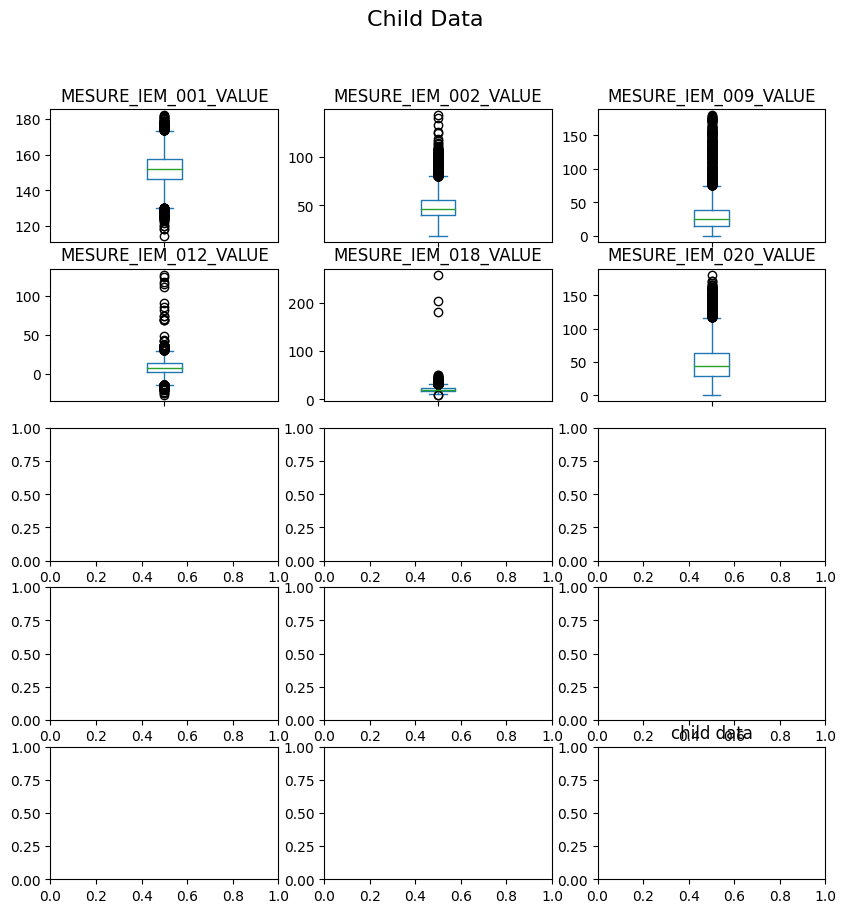

In [24]:
import matplotlib.pyplot as plt
# 유소년 데이터 기준 박스플롯
# 그림 초기화
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))

# 모든 열에 대해 박스플롯 그리기
for i, column in enumerate(data_child.columns[6:12]):
    ax = axes[i // 3, i % 3]
    data_child[column].plot(kind='box', ax=ax)
    ax.set_title(column)
    ax.set_xticklabels([])  # x축 레이블 제거

plt.suptitle('Child Data', fontsize=16)

# 레이아웃 조정
plt.title('child data')
plt.show()

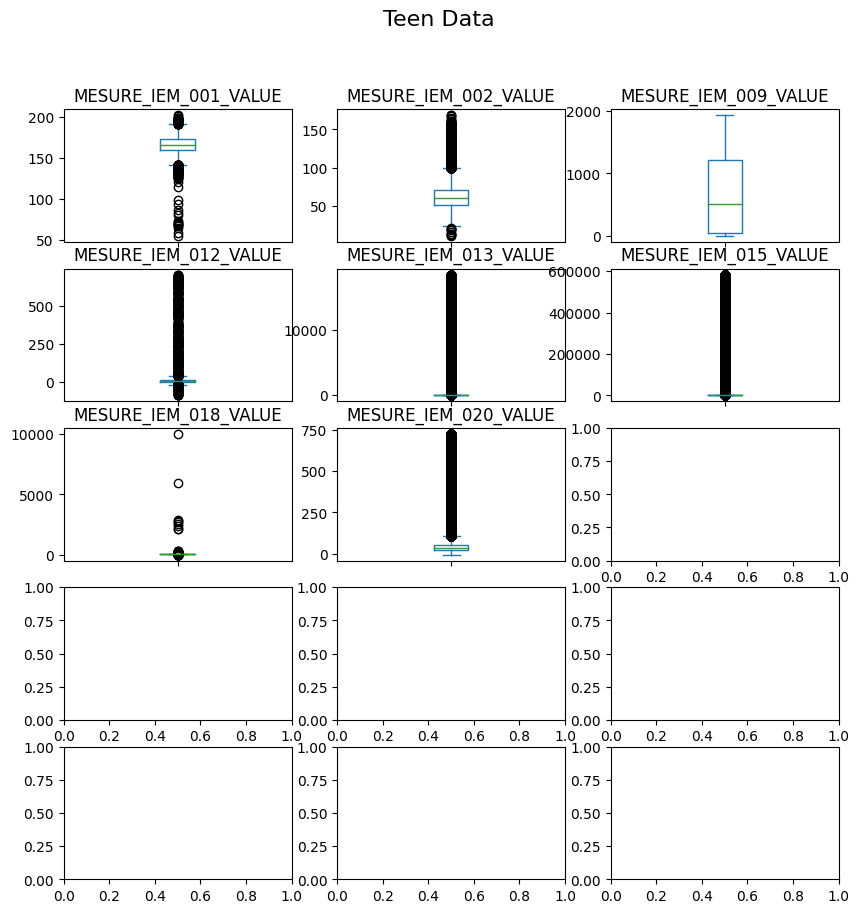

In [25]:
# 청소년(teen) 데이터 기준 박스플롯
# 그림 초기화
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))

# 모든 열에 대해 박스플롯 그리기
for i, column in enumerate(data_teen.columns[6:14]):
    ax = axes[i // 3, i % 3]
    data_teen[column].plot(kind='box', ax=ax)
    ax.set_title(column)
    ax.set_xticklabels([])  # x축 레이블 제거

plt.suptitle('Teen Data', fontsize=16)
plt.show()

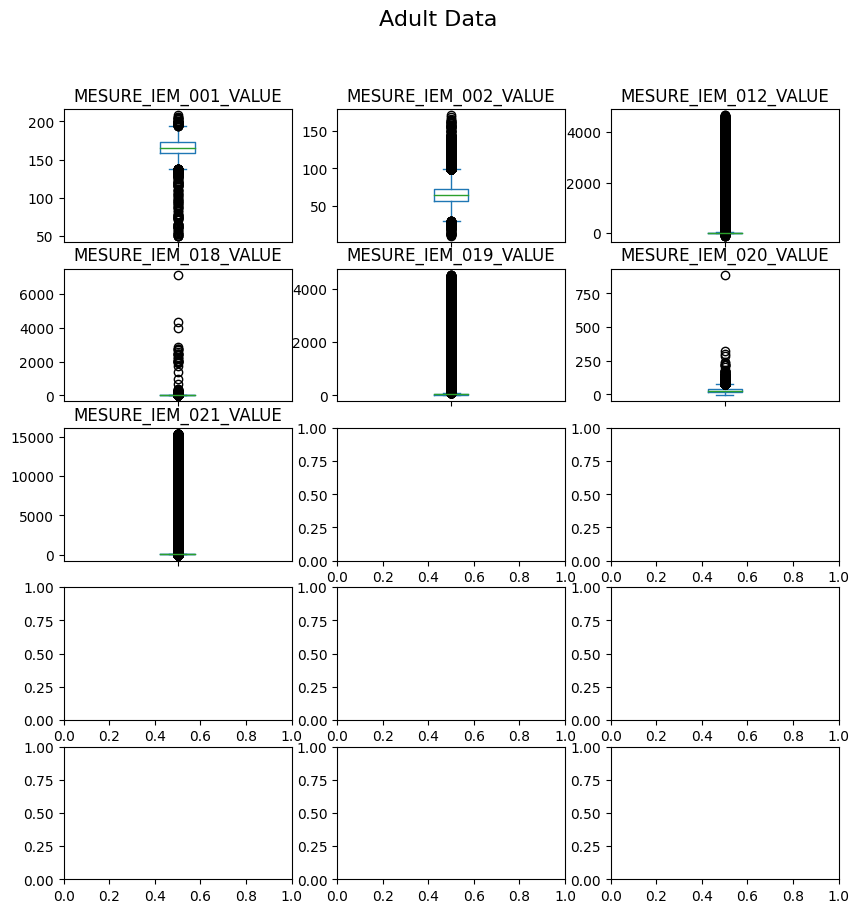

In [26]:
# 성인(adult) 데이터 기준 박스플롯
# 그림 초기화
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))

# 모든 열에 대해 박스플롯 그리기
for i, column in enumerate(data_adult.columns[6:13]):
    ax = axes[i // 3, i % 3]
    data_adult[column].plot(kind='box', ax=ax)
    ax.set_title(column)
    ax.set_xticklabels([])  # x축 레이블 제거

plt.suptitle('Adult Data', fontsize=16)
plt.show()

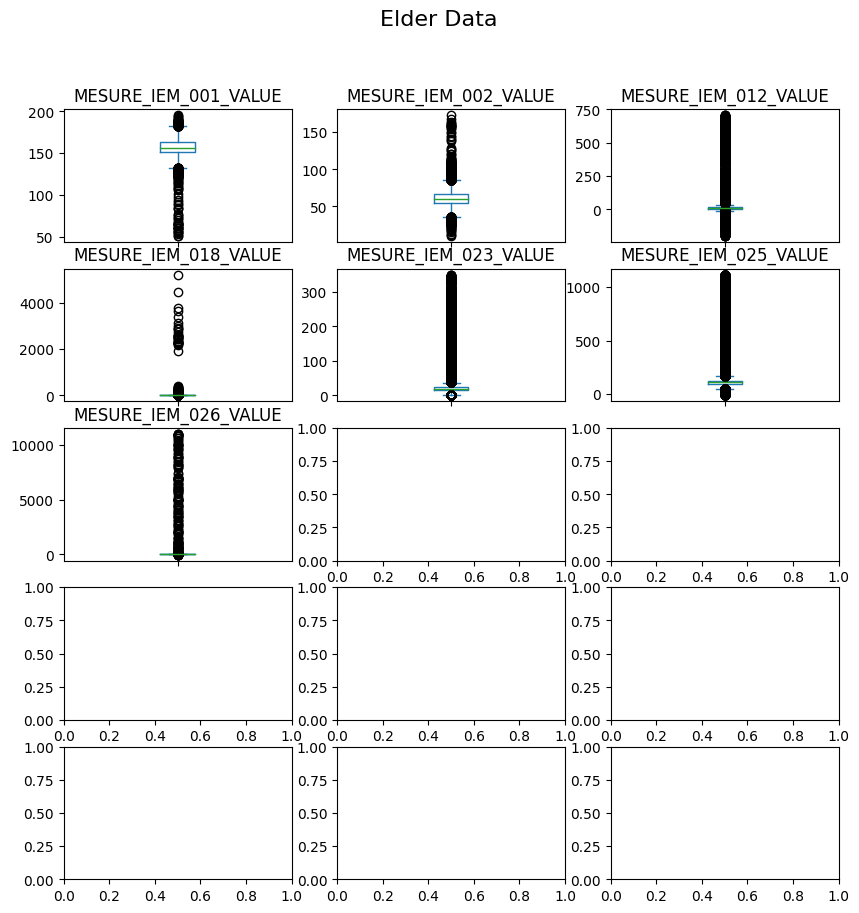

In [27]:
# 노인(elder) 데이터 기준 박스플롯
# 그림 초기화
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))

# 모든 열에 대해 박스플롯 그리기
for i, column in enumerate(data_elder.columns[6:13]):
    ax = axes[i // 3, i % 3]
    data_elder[column].plot(kind='box', ax=ax)
    ax.set_title(column)
    ax.set_xticklabels([])  # x축 레이블 제거

plt.suptitle('Elder Data', fontsize=16)
plt.show()

###  IQR을 활용한 이상치 체거

In [28]:
# iqr을 이용한 이상치 제거
# IQR 기준 이상치 제거 함수
def remove_outliers(df, column):
    q1 = df.loc[:, column].quantile(0.25)  # 1사분위수
    q3 = df.loc[:, column].quantile(0.75)  # 3사분위수
    iqr = q3 - q1  # IQR 계산
    lower_bound = q1 - 1.5 * iqr  # 하위 이상치 제거 기준
    upper_bound = q3 + 1.5 * iqr  # 상위 이상치 제거 기준
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]  # 이상치 제거
    return df_filtered

In [29]:
# data_child 상관도 분석하기
col_list = data_child.columns[6:-1].tolist()
col_list.append('CRTFC_FLAG_NM')
print(col_list)
data_child[col_list].corr()
# 20,9,12,18,2,22,1

['MESURE_IEM_001_VALUE', 'MESURE_IEM_002_VALUE', 'MESURE_IEM_009_VALUE', 'MESURE_IEM_012_VALUE', 'MESURE_IEM_018_VALUE', 'MESURE_IEM_020_VALUE', 'MESURE_IEM_022_VALUE', 'CRTFC_FLAG_NM']


,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_009_VALUE,MESURE_IEM_012_VALUE,MESURE_IEM_018_VALUE,MESURE_IEM_020_VALUE,MESURE_IEM_022_VALUE,CRTFC_FLAG_NM
MESURE_IEM_001_VALUE,1.000000,0.648739,0.096333,-0.027223,0.278060,-0.045239,0.118686,0.048770
MESURE_IEM_002_VALUE,0.648739,1.000000,-0.120610,-0.079085,0.845093,-0.309410,-0.059122,0.246726
MESURE_IEM_009_VALUE,0.096333,-0.120610,1.000000,0.122383,-0.185921,0.331523,0.242941,-0.377167
MESURE_IEM_012_VALUE,-0.027223,-0.079085,0.122383,1.000000,-0.076387,0.085407,0.093092,-0.336875
MESURE_IEM_018_VALUE,0.278060,0.845093,-0.185921,-0.076387,1.000000,-0.339533,-0.124287,0.266027
MESURE_IEM_020_VALUE,-0.045239,-0.309410,0.331523,0.085407,-0.339533,1.000000,0.298576,-0.522005
MESURE_IEM_022_VALUE,0.118686,-0.059122,0.242941,0.093092,-0.124287,0.298576,1.000000,-0.200948
CRTFC_FLAG_NM,0.048770,0.246726,-0.377167,-0.336875,0.266027,-0.522005,-0.200948,1.000000


In [30]:
# data_teen 상관도 분석하기
col_list = data_teen.columns[6:-1].tolist()
col_list.append('CRTFC_FLAG_NM')
print(col_list)
data_teen[col_list].corr()
# 22,2,12,13,15,18,9,20,1

['MESURE_IEM_001_VALUE', 'MESURE_IEM_002_VALUE', 'MESURE_IEM_009_VALUE', 'MESURE_IEM_012_VALUE', 'MESURE_IEM_013_VALUE', 'MESURE_IEM_015_VALUE', 'MESURE_IEM_018_VALUE', 'MESURE_IEM_020_VALUE', 'MESURE_IEM_022_VALUE', 'CRTFC_FLAG_NM']


,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_009_VALUE,MESURE_IEM_012_VALUE,MESURE_IEM_013_VALUE,MESURE_IEM_015_VALUE,MESURE_IEM_018_VALUE,MESURE_IEM_020_VALUE,MESURE_IEM_022_VALUE,CRTFC_FLAG_NM
MESURE_IEM_001_VALUE,1.000000,0.574218,-0.040056,-0.095575,0.051005,0.020816,0.002261,0.026565,0.456589,-0.006460
MESURE_IEM_002_VALUE,0.574218,1.000000,-0.038216,-0.053555,0.041958,0.004460,0.150839,-0.001876,0.109038,0.205189
MESURE_IEM_009_VALUE,-0.040056,-0.038216,1.000000,0.006591,-0.025739,0.012395,-0.003081,-0.067746,-0.039783,-0.039261
MESURE_IEM_012_VALUE,-0.095575,-0.053555,0.006591,1.000000,0.016471,0.011294,0.031871,0.025781,0.008557,-0.206084
MESURE_IEM_013_VALUE,0.051005,0.041958,-0.025739,0.016471,1.000000,0.415105,0.004274,0.039737,0.025571,0.075205
MESURE_IEM_015_VALUE,0.020816,0.004460,0.012395,0.011294,0.415105,1.000000,-0.001732,-0.014033,0.007048,0.044651
MESURE_IEM_018_VALUE,0.002261,0.150839,-0.003081,0.031871,0.004274,-0.001732,1.000000,0.000292,-0.016365,0.042838
MESURE_IEM_020_VALUE,0.026565,-0.001876,-0.067746,0.025781,0.039737,-0.014033,0.000292,1.000000,0.048137,-0.029247
MESURE_IEM_022_VALUE,0.456589,0.109038,-0.039783,0.008557,0.025571,0.007048,-0.016365,0.048137,1.000000,-0.272792
CRTFC_FLAG_NM,-0.006460,0.205189,-0.039261,-0.206084,0.075205,0.044651,0.042838,-0.029247,-0.272792,1.000000


In [31]:
# data_adult 상관도 분석하기
col_list = data_adult.columns[6:-1].tolist()
col_list.append('CRTFC_FLAG_NM')
print(col_list)
data_adult[col_list].corr()
# 20, 2, 22,18,21,19,1,12

['MESURE_IEM_001_VALUE', 'MESURE_IEM_002_VALUE', 'MESURE_IEM_012_VALUE', 'MESURE_IEM_018_VALUE', 'MESURE_IEM_019_VALUE', 'MESURE_IEM_020_VALUE', 'MESURE_IEM_021_VALUE', 'MESURE_IEM_022_VALUE', 'CRTFC_FLAG_NM']


,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_012_VALUE,MESURE_IEM_018_VALUE,MESURE_IEM_019_VALUE,MESURE_IEM_020_VALUE,MESURE_IEM_021_VALUE,MESURE_IEM_022_VALUE,CRTFC_FLAG_NM
MESURE_IEM_001_VALUE,1.000000,0.657343,-0.008080,-0.017849,0.072380,0.526361,0.060735,0.318533,-0.022096
MESURE_IEM_002_VALUE,0.657343,1.000000,-0.009378,0.123127,0.046620,0.249610,0.059142,0.194424,0.138708
MESURE_IEM_012_VALUE,-0.008080,-0.009378,1.000000,-0.000837,0.073240,-0.000398,0.010136,0.021607,-0.007595
MESURE_IEM_018_VALUE,-0.017849,0.123127,-0.000837,1.000000,0.000291,-0.012126,0.003682,0.001804,0.033360
MESURE_IEM_019_VALUE,0.072380,0.046620,0.073240,0.000291,1.000000,0.081138,0.054862,0.133790,-0.024342
MESURE_IEM_020_VALUE,0.526361,0.249610,-0.000398,-0.012126,0.081138,1.000000,0.057829,0.329343,-0.388784
MESURE_IEM_021_VALUE,0.060735,0.059142,0.010136,0.003682,0.054862,0.057829,1.000000,0.249245,-0.030902
MESURE_IEM_022_VALUE,0.318533,0.194424,0.021607,0.001804,0.133790,0.329343,0.249245,1.000000,-0.114207
CRTFC_FLAG_NM,-0.022096,0.138708,-0.007595,0.033360,-0.024342,-0.388784,-0.030902,-0.114207,1.000000


In [32]:
# data_elder 상관도 분석하기
col_list = data_elder.columns[6:-1].tolist()
col_list.append('CRTFC_FLAG_NM')
print(col_list)
data_elder[col_list].corr()
# 23,12,25,2,1,27,18,26

['MESURE_IEM_001_VALUE', 'MESURE_IEM_002_VALUE', 'MESURE_IEM_012_VALUE', 'MESURE_IEM_018_VALUE', 'MESURE_IEM_023_VALUE', 'MESURE_IEM_025_VALUE', 'MESURE_IEM_026_VALUE', 'MESURE_IEM_027_VALUE', 'CRTFC_FLAG_NM']


,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_012_VALUE,MESURE_IEM_018_VALUE,MESURE_IEM_023_VALUE,MESURE_IEM_025_VALUE,MESURE_IEM_026_VALUE,MESURE_IEM_027_VALUE,CRTFC_FLAG_NM
MESURE_IEM_001_VALUE,1.000000,0.614083,-0.125143,-0.049567,0.098953,0.030570,-0.004882,-0.029159,-0.060032
MESURE_IEM_002_VALUE,0.614083,1.000000,-0.097385,0.073992,0.029391,-0.004810,0.001789,-0.012401,0.109537
MESURE_IEM_012_VALUE,-0.125143,-0.097385,1.000000,-0.003428,0.085225,0.034742,0.037606,-0.007663,-0.170508
MESURE_IEM_018_VALUE,-0.049567,0.073992,-0.003428,1.000000,-0.008344,-0.005517,0.000453,0.001506,0.023275
MESURE_IEM_023_VALUE,0.098953,0.029391,0.085225,-0.008344,1.000000,0.130493,0.087224,-0.035040,-0.266491
MESURE_IEM_025_VALUE,0.030570,-0.004810,0.034742,-0.005517,0.130493,1.000000,0.026854,-0.022505,-0.107658
MESURE_IEM_026_VALUE,-0.004882,0.001789,0.037606,0.000453,0.087224,0.026854,1.000000,0.117151,0.013778
MESURE_IEM_027_VALUE,-0.029159,-0.012401,-0.007663,0.001506,-0.035040,-0.022505,0.117151,1.000000,0.050640
CRTFC_FLAG_NM,-0.060032,0.109537,-0.170508,0.023275,-0.266491,-0.107658,0.013778,0.050640,1.000000


In [33]:
#data_child 이상치 제거
# 20,9,12,18,2,22,1
columns= [ 'MESURE_IEM_020_VALUE','MESURE_IEM_009_VALUE','MESURE_IEM_012_VALUE','MESURE_IEM_018_VALUE','MESURE_IEM_002_VALUE', 'MESURE_IEM_022_VALUE','MESURE_IEM_001_VALUE'
        
]

for i in columns:
        if i =="MESURE_IEM_020_VALUE":
            data_child_outlier = remove_outliers(data_child, i)
        else:
            data_child_outlier = remove_outliers(data_child_outlier,i)
print(data_child_outlier.shape)



(29277, 14)


In [34]:
# data_teen 이상치 제거
# 22,2,12,13,15,18,9,20,1
columns= ['MESURE_IEM_022_VALUE','MESURE_IEM_002_VALUE','MESURE_IEM_012_VALUE','MESURE_IEM_013_VALUE','MESURE_IEM_015_VALUE','MESURE_IEM_018_VALUE',
         'MESURE_IEM_009_VALUE',
         
       'MESURE_IEM_020_VALUE', 'MESURE_IEM_001_VALUE'

]

for i in columns:
        if i =="MESURE_IEM_022_VALUE":
            data_teen_outlier = remove_outliers(data_teen, i)
        else:
            data_teen_outlier = remove_outliers(data_teen_outlier,i)
print(data_teen_outlier.shape)

(181169, 16)


#### data_teen에 대해 해당 연령값에서 벗어난 데이터 삭제

In [35]:
data_teen=data_teen[data_teen['MESURE_AGE_CO']>=13]
data_teen=data_teen[data_teen['MESURE_AGE_CO']<=18]
data_teen['MESURE_AGE_CO'].describe()

count    235781.000000
mean         15.402259
std           1.586854
min          13.000000
25%          14.000000
50%          16.000000
75%          17.000000
max          18.000000
Name: MESURE_AGE_CO, dtype: float64

In [36]:
data_teen['MESURE_AGE_CO'].value_counts()

MESURE_AGE_CO
16.0    50231
17.0    49515
13.0    41780
15.0    41531
14.0    32257
18.0    20467
Name: count, dtype: int64

In [37]:
# data_adult 이상치 제거
# 20, 2, 22,18,21,19,1,12
columns= ['MESURE_IEM_020_VALUE','MESURE_IEM_002_VALUE','MESURE_IEM_022_VALUE','MESURE_IEM_018_VALUE','MESURE_IEM_021_VALUE','MESURE_IEM_019_VALUE','MESURE_IEM_001_VALUE',
        'MESURE_IEM_012_VALUE'
        
       
]

for i in columns:
        if i =="MESURE_IEM_020_VALUE":
            data_adult_outlier = remove_outliers(data_adult, i)
        else:
            data_adult_outlier = remove_outliers(data_adult_outlier,i)
print(data_adult_outlier.shape)

(377609, 15)


#### data_adult에 대해 음수가 나올 수 없는 데이터의 음수 측정값 삭제

In [38]:
data_adult=data_adult[data_adult['MESURE_IEM_020_VALUE']>0]
data_adult=data_adult[data_adult['MESURE_IEM_021_VALUE']>0]
print(data_adult['MESURE_IEM_020_VALUE'].describe())
print(data_adult['MESURE_IEM_021_VALUE'].describe())

count    419850.000000
mean         29.202686
std          19.333800
min           0.100000
25%          15.000000
50%          24.000000
75%          40.000000
max         890.000000
Name: MESURE_IEM_020_VALUE, dtype: float64
count    419850.000000
mean        211.724217
std        1413.842521
min           0.090000
25%          11.160000
50%          12.850000
75%          14.530000
max       15399.000000
Name: MESURE_IEM_021_VALUE, dtype: float64


In [39]:
# data_adult에 대해 나이 이상치 제거
data_adult=data_adult[data_adult['MESURE_AGE_CO']>=19]
data_adult=data_adult[data_adult['MESURE_AGE_CO']<=65]
print(data_adult['MESURE_AGE_CO'].describe())

count    419797.000000
mean         37.124122
std          15.082095
min          19.000000
25%          22.000000
50%          35.000000
75%          51.000000
max          65.000000
Name: MESURE_AGE_CO, dtype: float64


In [40]:
# data_elder 이상치 제거
# 23,12,25,2,1,27,18,26
columns= ['MESURE_IEM_023_VALUE','MESURE_IEM_012_VALUE','MESURE_IEM_025_VALUE','MESURE_IEM_002_VALUE','MESURE_IEM_001_VALUE',
         'MESURE_IEM_027_VALUE','MESURE_IEM_018_VALUE','MESURE_IEM_026_VALUE'
         
       
]

for i in columns:
        if i =="MESURE_IEM_023_VALUE":
            data_elder_outlier = remove_outliers(data_elder, i)
        else:
            data_elder_outlier = remove_outliers(data_elder_outlier,i)
print(data_elder_outlier.shape)

(193444, 15)


#### data_elder에 대해 음수가 나올 수 없는 데이터의 음수 측정값 삭제

In [41]:

data_elder = data_elder[data_elder['MESURE_IEM_026_VALUE']>0].describe()
data_elder['MESURE_IEM_026_VALUE'].describe()


count         8.000000
mean      31038.334194
std       83349.513020
min           0.100000
25%           5.900000
50%           8.537471
75%        2873.073960
max      237098.000000
Name: MESURE_IEM_026_VALUE, dtype: float64

In [42]:
data_elder=data_elder[data_elder['MESURE_AGE_CO']>=65]
data_elder.drop(data_elder[data_elder['MESURE_AGE_CO'] == 173].index,inplace=True)
data_elder.drop(data_elder[data_elder['MESURE_AGE_CO'] == 118].index,inplace=True)

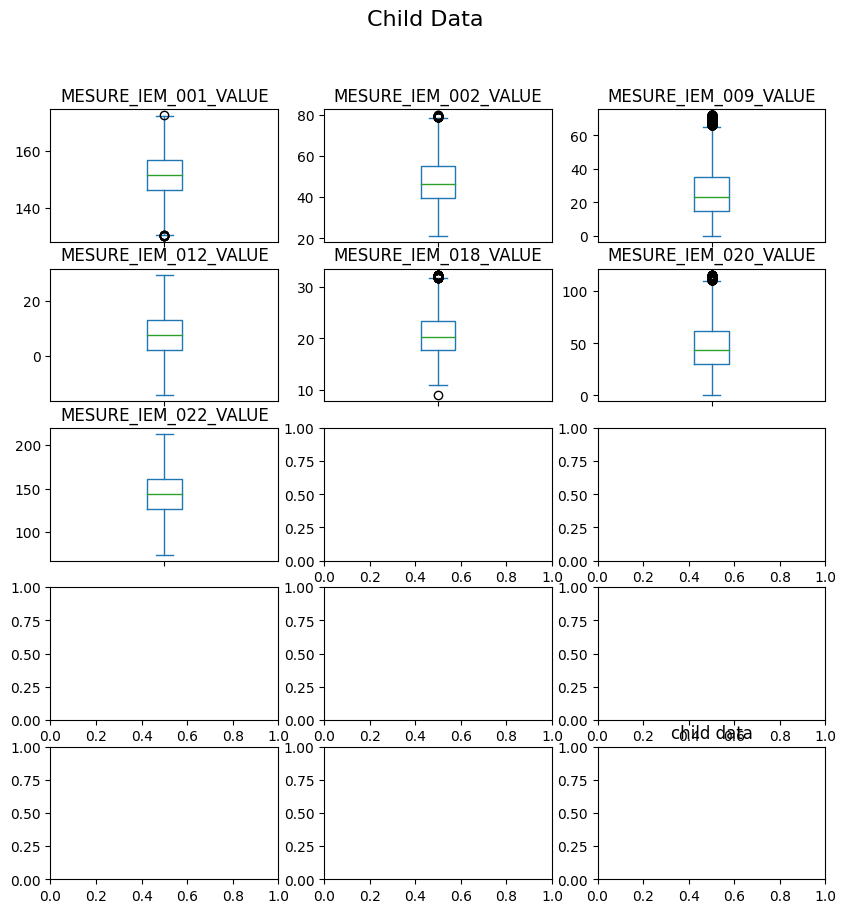

In [43]:
# 유소년 데이터 기준 박스플롯
# 그림 초기화
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))

# 모든 열에 대해 박스플롯 그리기
for i, column in enumerate(data_child_outlier.columns[6:-1]):
    ax = axes[i // 3, i % 3]
    data_child_outlier[column].plot(kind='box', ax=ax)
    ax.set_title(column)
    ax.set_xticklabels([])  # x축 레이블 제거

plt.suptitle('Child Data', fontsize=16)

# 레이아웃 조정
plt.title('child data')
plt.show()

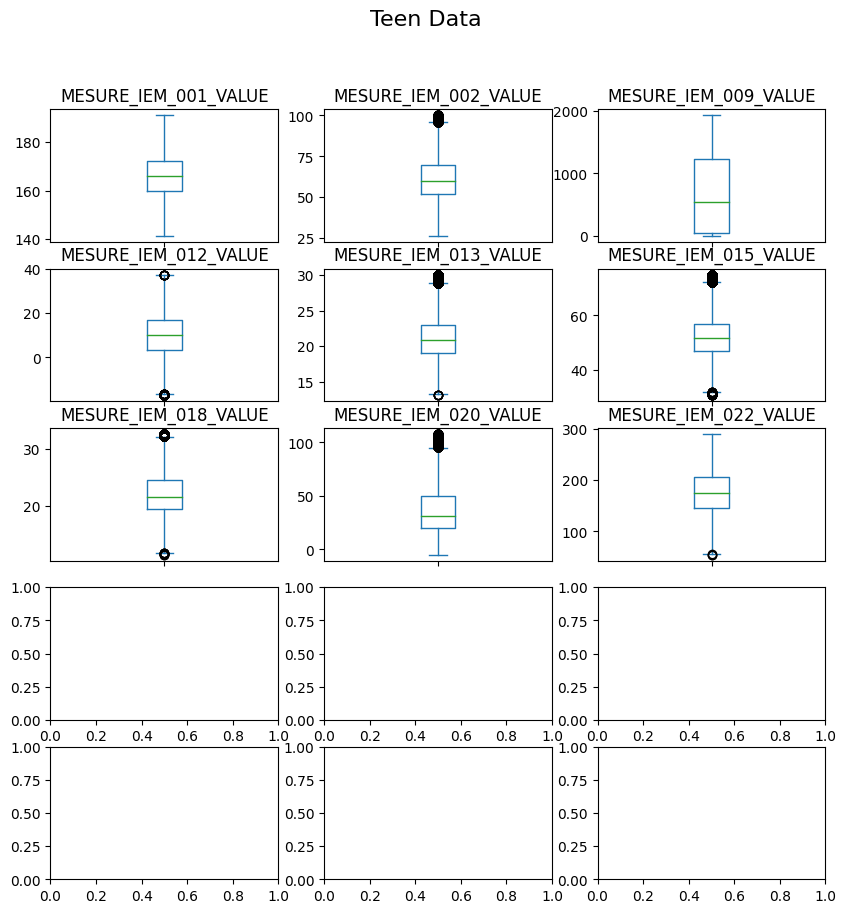

In [44]:
# 청소년(teen) 데이터 기준 박스플롯
# 그림 초기화
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))

# 모든 열에 대해 박스플롯 그리기
for i, column in enumerate(data_teen_outlier.columns[6:-1]):
    ax = axes[i // 3, i % 3]
    data_teen_outlier[column].plot(kind='box', ax=ax)
    ax.set_title(column)
    ax.set_xticklabels([])  # x축 레이블 제거

plt.suptitle('Teen Data', fontsize=16)
plt.show()

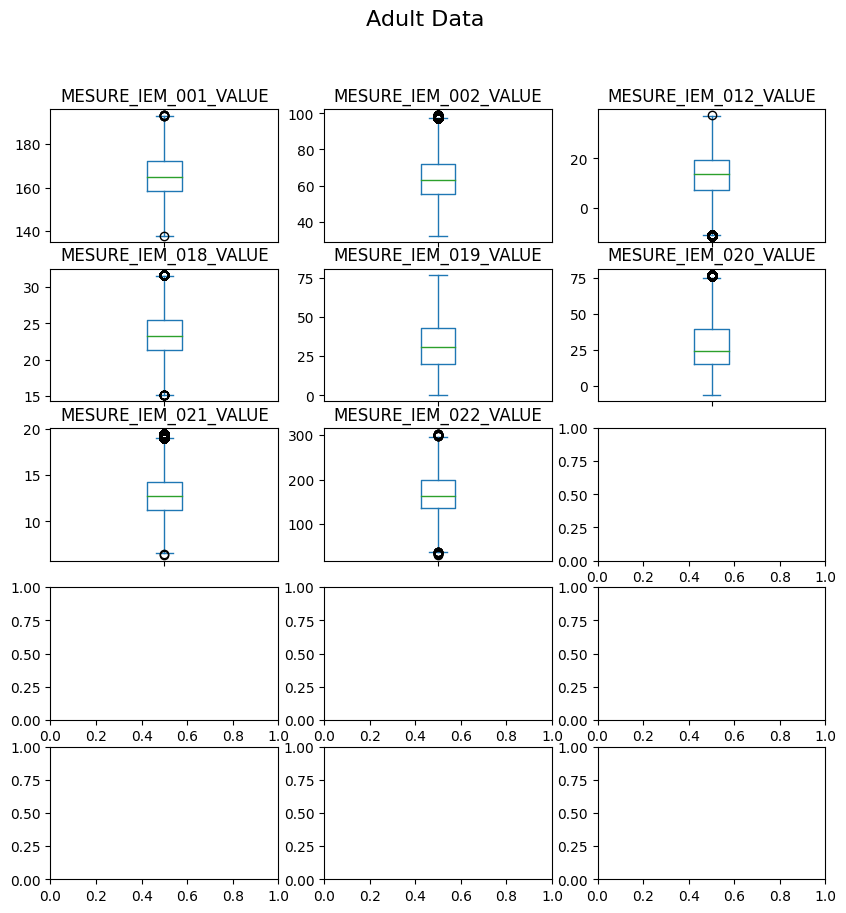

In [45]:
# 성인(adult) 데이터 기준 박스플롯
# 그림 초기화
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))

# 모든 열에 대해 박스플롯 그리기
for i, column in enumerate(data_adult_outlier.columns[6:-1]):
    ax = axes[i // 3, i % 3]
    data_adult_outlier[column].plot(kind='box', ax=ax)
    ax.set_title(column)
    ax.set_xticklabels([])  # x축 레이블 제거

plt.suptitle('Adult Data', fontsize=16)
plt.show()

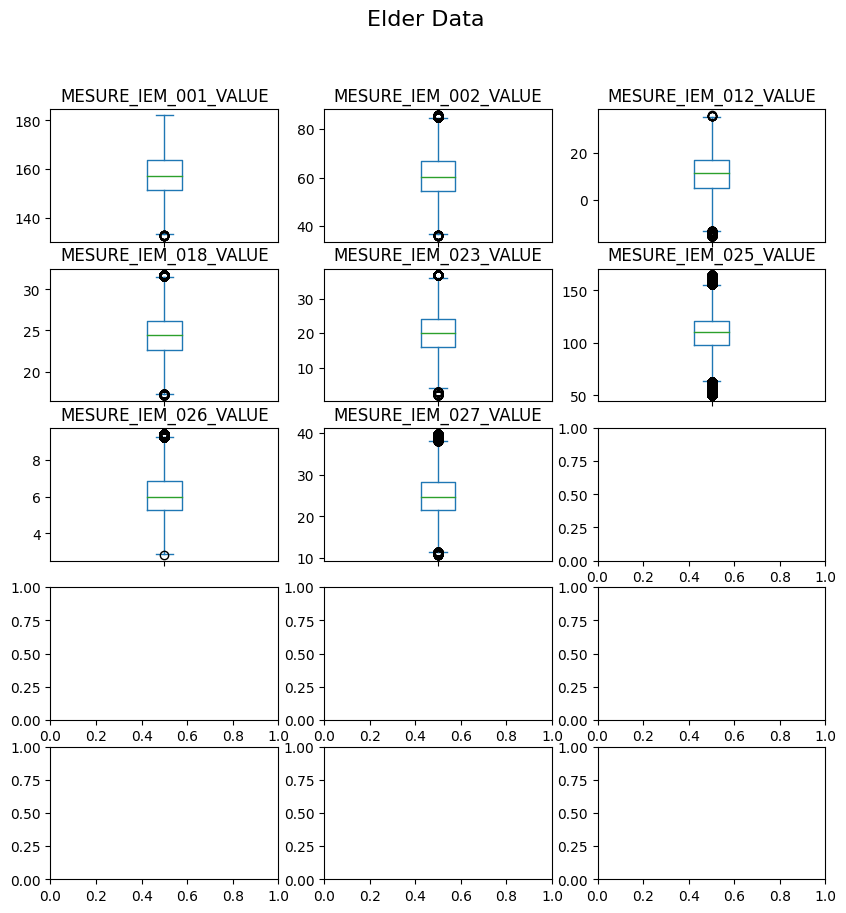

In [46]:
# 노인(elder) 데이터 기준 박스플롯
# 그림 초기화
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))

# 모든 열에 대해 박스플롯 그리기
for i, column in enumerate(data_elder_outlier.columns[6:-1]):
    ax = axes[i // 3, i % 3]
    data_elder_outlier[column].plot(kind='box', ax=ax)
    ax.set_title(column)
    ax.set_xticklabels([])  # x축 레이블 제거

plt.suptitle('Elder Data', fontsize=16)
plt.show()

In [58]:
import pandas as pd
pathname = r"C:\Users\ysoju\Documents\my_ws\project\data_project\data_child2.xlsx"
data_child_criteria = pd.read_excel(pathname)

# 등급표 인코딩하기
data_child_criteria['등급'] = data_child_criteria['등급'].map({ '3등급':3, '2등급':2, '1등급':1})
print(data_child_criteria.head(10))

   등급  나이 성별  MESURE_IEM_020_VALUE  MESURE_IEM_022_VALUE  \
0   1  11  남                    77                 161.0   
1   1  12  남                    91                 160.3   
2   2  11  남                    59                 147.0   
3   2  12  남                    70                 146.0   
4   3  11  남                    46                 133.0   
5   3  12  남                    55                 133.0   
6   1  11  여                    62                 165.0   
7   1  12  여                    62                 164.0   
8   2  11  여                    51                 146.0   
9   2  12  여                    51                 145.0   

   MESURE_IEM_022_VALUE.1  MESURE_IEM_012_VALUE  MESURE_IEM_009_VALUE  
0                   161.0                  11.5                    36  
1                   160.3                  12.0                    35  
2                   147.0                   7.8                    26  
3                   146.0                   7.9    

In [59]:
import pandas as pd
pathname = r"C:\Users\ysoju\Documents\my_ws\project\data_project\data_teen2.xlsx"
data_teen_criteria = pd.read_excel(pathname)

# 등급표 인코딩하기
data_teen_criteria['등급'] = data_teen_criteria['등급'].map({ '3등급':3, '2등급':2, '1등급':1})
print(data_teen_criteria.head(10))

   등급  나이 성별  MESURE_IEM_020_VALUE  MESURE_IEM_022_VALUE  \
0   1  13  남                    50                   185   
1   1  14  남                    56                   192   
2   1  15  남                    56                   199   
3   1  16  남                    57                   206   
4   1  17  남                    59                   213   
5   1  18  남                    61                   219   
6   2  13  남                    40                   168   
7   2  14  남                    46                   175   
8   2  15  남                    46                   182   
9   2  16  남                    47                   189   

   MESURE_IEM_012_VALUE  MESURE_IEM_009_VALUE  MESURE_IEM_013_VALUE  \
0                   9.6                    61                  19.1   
1                  10.9                    60                  18.7   
2                  11.9                    49                  19.0   
3                  13.8                    49          

In [60]:
import pandas as pd
pathname = r"C:\Users\ysoju\Documents\my_ws\project\data_project\data_adult.xlsx"
data_adult_criteria = pd.read_excel(pathname)
# 등급표 인코딩하기
data_adult_criteria['등급'] = data_adult_criteria['등급'].map({ '3등급':3, '2등급':2, '1등급':1})
print(data_adult_criteria.tail(10))

    등급     나이 성별  MESURE_IEM_020_VALUE  MESURE_IEM_022_VALUE  \
44   3  40~44  남                    27                   191   
45   3  40~44  여                    15                   129   
46   3  45~49  남                    24                   186   
47   3  45~49  여                    14                   131   
48   3  50~54  남                    21                   182   
49   3  50~54  여                    12                   129   
50   3  55~59  남                    18                   175   
51   3  55~59  여                    11                   123   
52   3  60~64  남                    15                   164   
53   3  60~64  여                     9                   113   

    MESURE_IEM_019_VALUE  MESURE_IEM_021_VALUE  MESURE_IEM_022_VALUE.1  \
44                    32                  12.6                     191   
45                    19                  14.9                     129   
46                    30                  12.9                     186   

In [61]:
import pandas as pd
pathname = r"C:\Users\ysoju\Documents\my_ws\project\data_project\data_elder2.xlsx"
data_elder_criteria = pd.read_excel(pathname)
# 등급표 인코딩하기
data_elder_criteria['등급'] = data_elder_criteria['등급'].map({ '3등급':3, '2등급':2, '1등급':1})
print(data_elder_criteria.head(10))


   등급     나이 성별  MESURE_IEM_025_VALUE  MESURE_IEM_027_VALUE  \
0   1  65~69  남                   122                  21.0   
1   1  70~74  남                   116                  22.5   
2   1  75~79  남                   112                  24.0   
3   1  80~84  남                   105                  26.3   
4   1    85~  남                    94                  28.5   
5   2  65~69  남                   109                  23.9   
6   2  70~74  남                   103                  25.6   
7   2  75~79  남                    97                  27.8   
8   2  80~84  남                    89                  30.8   
9   2    85~  남                    77                  33.6   

   MESURE_IEM_023_VALUE  MESURE_IEM_027_VALUE.1  MESURE_IEM_012_VALUE  \
0                    25                    21.0                  11.4   
1                    22                    22.5                   9.2   
2                    20                    24.0                   7.5   
3             

In [51]:
import pandas as pd
pathname = r"C:\Users\ysoju\Documents\my_ws\project\data_project\recommended_exercise_list.xlsx"
recommended_exercise = pd.read_excel(pathname)
recommended_exercise

,나이,체력항목,추천 운동 동영상
0,11~12,근력,https://youtu.be/KLp2eCPRc6Q
1,11~12,근력,https://youtu.be/LXvXhGDda-c
2,11~12,근력,https://youtu.be/3ofToKYGZX4
3,11~12,심폐지구력,https://youtu.be/7Rqc2MhfqKU
4,11~12,심폐지구력,https://youtu.be/fo1FlS41oig
...,...,...,...
67,65~,순발력,https://youtu.be/1fA4qBGyqhM
68,65~,순발력,https://youtu.be/N7IBjoT4oGo
69,65~,평형성,https://youtu.be/Csa1WTJc5ys
70,65~,평형성,https://youtu.be/1CTWSroJe3g


    등급  나이 성별  MESURE_IEM_020_VALUE  MESURE_IEM_022_VALUE  \
6    1  11  여                    62                 165.0   
8    2  11  여                    51                 146.0   
10   3  11  여                    40                 125.0   

    MESURE_IEM_022_VALUE.1  MESURE_IEM_012_VALUE  MESURE_IEM_009_VALUE  
6                    165.0                  10.9                    36  
8                    146.0                   6.5                    26  
10                   125.0                   3.0                    18  


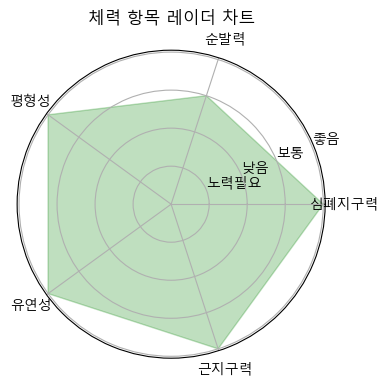

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 기입했을 때 레이더 차트 그려지도록

# 값이 높을수록 좋은 등급인 측정 항목 (~ 이상): 9, 12, 19, 20, 22, 23, 25 
# 값이 낮을수록 좋은 등급인 측정 항목 (~ 이하): 13, 15, 21, 26, 27
positive_rating = ('MESURE_IEM_009_VALUE','MESURE_IEM_012_VALUE','MESURE_IEM_019_VALUE','MESURE_IEM_020_VALUE','MESURE_IEM_022_VALUE','MESURE_IEM_022_VALUE.1','MESURE_IEM_023_VALUE','MESURE_IEM_025_VALUE')
negative_rating = ('MESURE_IEM_013_VALUE','MESURE_IEM_015_VALUE','MESURE_IEM_021_VALUE','MESURE_IEM_026_VALUE','MESURE_IEM_027_VALUE','MESURE_IEM_027_VALUE.1')

def child_health_estimate(age, gender, value1, value2, value3, value4, *value5):
    # 기준표 성별 범위,나이 범위 좁히기
    data_list = []
    if age<=12:
        data_child_gender = data_child_criteria[data_child_criteria['성별']==gender]
        data_age = data_child_gender[data_child_gender['나이']==age]
        print(data_age.head())
    columns = data_age.columns.tolist()
    if value5:
        data_list = [value1, value2, value3, value4]
        for value in value5:
            data_list.append(value)
    else:
        data_list = [value1, value2, value3, value4]
    
    #행 하나씩 내려가게
    grade_li = []
    
    for i in range(0,len(data_list)):  #열에 적용
        grade_cnt = 0
        grade=1
        for index, row in data_age.iterrows(): # 행에 적용
            if columns[i+3] in positive_rating:
                if row[columns[i+3]] <= data_list[i]:
                    if grade <= 5-int(row['등급']):
                        grade = 5-int(row['등급'])
                        grade_li.append(grade)
                    break
                else:
                    grade_cnt = grade_cnt +1
                if grade_cnt==3:
                    grade = 1
                    grade_li.append(grade)
                    
            elif columns[i+3] in negative_rating:
                if row[columns[i+3]] >= data_list[i]:
                    if grade <= 5-int(row['등급']):
                        grade=5-int(row['등급'])
                        grade_li.append(grade)
                    break
                else:
                    grade_cnt = grade_cnt +1
                if grade_cnt ==3:
                    grade = 1
                    grade_li.append(grade)
    making_radar_chart(grade_li)

def making_radar_chart(grade_li):
    # 데이터 준비
    values=[]
    num_vars = 0
    categories = []
    if len(grade_li) ==4:
        categories = ['심폐지구력', '순발력', '평형성', '유연성']
        num_vars = len(categories)
        for i in range(len(grade_li)):
            values.append(grade_li[i])


    elif len(grade_li) ==5:
        categories = ['심폐지구력', '순발력',  '평형성', '유연성','근지구력']
        num_vars = len(categories)
        for i in range(len(grade_li)):
            values.append(grade_li[i])
    # 각 카테고리의 각도 계산
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    # 첫 번째 요소를 뒤로 복사하여 폐곡선을 만듭니다.
    values += values[:1]
    angles += angles[:1]

    # 레이더 차트 그리기
    plt.rc('font', family='Malgun Gothic')
    fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='green', alpha=0.25)

    # 각 카테고리에 레이블 추가
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    # y축 눈금을 1 단위로 설정
    ax.set_yticks(np.arange(1, 5, 1))
    ax.set_yticklabels(['노력필요', '낮음', '보통','좋음'])

    # 차트 제목
    plt.rc('font', family='Malgun Gothic')
    plt.title('체력 항목 레이더 차트',pad=20)

    # 차트 표시
    plt.show()
    
child_health_estimate(11,'여',62,164,165,10.9,36)

[47, 189, 8.9]
[3, 3, 3]


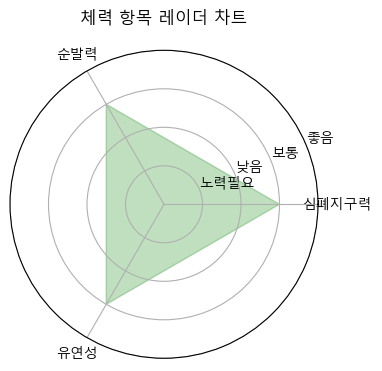

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 기입했을 때 레이더 차트 그려지도록

# 값이 높을수록 좋은 등급인 측정 항목 (~ 이상): 9, 12, 19, 20, 22, 23, 25 
# 값이 낮을수록 좋은 등급인 측정 항목 (~ 이하): 13, 15, 21, 26, 27
positive_rating = ('MESURE_IEM_009_VALUE','MESURE_IEM_012_VALUE','MESURE_IEM_019_VALUE','MESURE_IEM_020_VALUE','MESURE_IEM_022_VALUE','MESURE_IEM_022_VALUE.1','MESURE_IEM_023_VALUE','MESURE_IEM_025_VALUE')
negative_rating = ('MESURE_IEM_013_VALUE','MESURE_IEM_015_VALUE','MESURE_IEM_021_VALUE','MESURE_IEM_026_VALUE','MESURE_IEM_027_VALUE','MESURE_IEM_027_VALUE.1')
def teen_health_estimate(age,gender,value1, value2, value3, *value4):
    # 기준표 성별 범위,나이 범위 좁히기
    data_list=[]
    if age>=13:
        data_teen_gender = data_teen_criteria[data_teen_criteria['성별']==gender]
        data_age = data_teen_gender[data_teen_gender['나이']==age]
    columns = data_age.columns.tolist()
    if value4:
        data_list = [value1, value2, value3]
        for arg in value4:
            data_list.append(arg)
    
    else:
        data_list = [value1, value2, value3]
    
    #행 하나씩 내려가게
    grade_li = []
    
    for i in range(0,len(data_list)): 
        grade_cnt = 0
        grade=1
        for index, row in data_age.iterrows():
            
            if columns[i+3] in positive_rating:
                if row[columns[i+3]] <= data_list[i]:
                    if grade <= 5-int(row['등급']):
                        grade = 5-int(row['등급'])
                        #print(grade)
                        grade_li.append(grade)
                    break
                else:
                    grade_cnt = grade_cnt +1
                if grade_cnt==3:
                    grade = 1
                    grade_li.append(grade)
                
            elif columns[i+3] in negative_rating:
                if row[columns[i+3]] >= data_list[i]:
                    if grade <= 5-int(row['등급']):
                        grade=5-int(row['등급'])
                        #print(grade)
                        grade_li.append(grade)
                    break
                else:
                    grade_cnt = grade_cnt +1
                if grade_cnt ==3:
                    grade = 1
                    grade_li.append(grade)
                
    making_radar_chart(grade_li)

def making_radar_chart(grade_li):
    # 데이터 준비
    values=[]
    num_vars = 0
    categories = []
    if len(grade_li) ==3:
        categories = ['심폐지구력', '순발력', '유연성']
        num_vars = len(categories)
        for i in range(len(grade_li)):
            values.append(grade_li[i])


    elif len(grade_li) ==6:
        categories = ['심폐지구력', '순발력','유연성', '근지구력', '민첩성', '평형성', ]
        num_vars = len(categories)
        for i in range(len(grade_li)):
            values.append(grade_li[i])
    # 각 카테고리의 각도 계산
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    # 첫 번째 요소를 뒤로 복사하여 폐곡선을 만듭니다.
    values += values[:1]
    angles += angles[:1]

    # 레이더 차트 그리기
    plt.rc('font', family='Malgun Gothic')
    fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='green', alpha=0.25)

    # 각 카테고리에 레이블 추가
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    # y축 눈금을 1 단위로 설정
    ax.set_yticks(np.arange(1, 5, 1))
    ax.set_yticklabels(['노력필요', '낮음', '보통','좋음'])

    # 차트 제목
    plt.rc('font', family='Malgun Gothic')
    plt.title('체력 항목 레이더 차트',pad=20)

    # 차트 표시
    plt.show()

teen_health_estimate(16,'남',47,189,8.9)

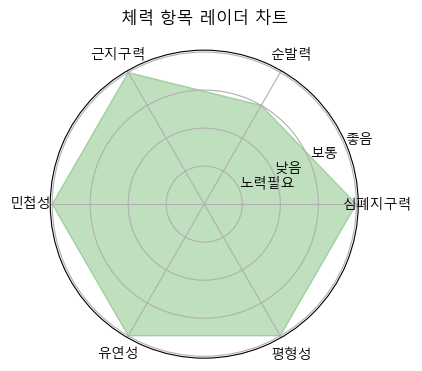

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 기입했을 때 레이더 차트 그려지도록

# 값이 높을수록 좋은 등급인 측정 항목 (~ 이상): 9, 12, 19, 20, 22, 23, 25 
# 값이 낮을수록 좋은 등급인 측정 항목 (~ 이하): 13, 15, 21, 26, 27
positive_rating = ('MESURE_IEM_009_VALUE','MESURE_IEM_012_VALUE','MESURE_IEM_019_VALUE','MESURE_IEM_020_VALUE','MESURE_IEM_022_VALUE','MESURE_IEM_022_VALUE.1','MESURE_IEM_023_VALUE','MESURE_IEM_025_VALUE')
negative_rating = ('MESURE_IEM_013_VALUE','MESURE_IEM_015_VALUE','MESURE_IEM_021_VALUE','MESURE_IEM_026_VALUE','MESURE_IEM_027_VALUE','MESURE_IEM_027_VALUE.1')

def adult_health_estimate(age,gender, value1,value2,value3,value4,value5,value6):
    data_list = []
    # 기준표 성별,나이 범위 좁히기    
    if age<=64 and age>=19:
        data_adult_gender = data_adult_criteria[data_adult_criteria['성별']==gender]
        ranges = [(i, i + 4) for i in range(25, 65, 5)]
        ranges.append((19, 24))
        for start, end in ranges:
            if start <= age <= end:
                data_age = data_adult_gender[data_adult_gender['나이']==f'{start}~{end}'] 
            
    columns = data_age.columns.tolist()   
    
    data_list = [value1, value2, value3, value4, value5, value6]

    #행 하나씩 내려가게
    grade_li = []
    for i in range(0, len(data_list)):
        grade_cnt = 0
        grade = 1
        for index, row in data_age.iterrows():
            #print(data_age.columns[i])
            #print(row)
            if columns[i+3] in positive_rating:
                if row[data_age.columns.tolist()[i+3]] <= data_list[i]:
                    #print(row[data_age.columns.tolist()[i]], "입력값=>",data_list[i-3])
                    if grade<= 5-int(row['등급']):
                        grade = 5- int(row['등급'])
                        #print(grade,grade_cnt)
                        grade_li.append(grade)
                        #print(grade_li)
                    break                        

                else:
                    grade_cnt = grade_cnt +1
                if grade_cnt == 3:
                    grade = 1
                    grade_li.append(grade)
                    #print(grade_li)

            elif columns[i+3] in negative_rating:
                if row[columns[i+3]] >= data_list[i]:
                    #print(row[data_age.columns.tolist()[i]], "입력값=>",data_list[i-3])
                    if grade<= 5-int(row['등급']):
                        grade = 5-int(row['등급'])
                        grade_li.append(grade)
                        #print(grade_li)
                    break
                else:
                    grade_cnt = grade_cnt +1
                if grade_cnt ==3:
                    grade = 1
                    grade_li.append(grade)
                    #print(grade_li)
    
    making_radar_chart(grade_li)


def making_radar_chart(grade_li):
    # 데이터 준비
    values=[]
    num_vars = 0
    categories = []
    if len(grade_li) ==5:
        categories = ['심폐지구력', '순발력', '근지구력', '민첩성', '유연성']
        num_vars = len(categories)
        for i in range(len(grade_li)):
            values.append(grade_li[i])


    elif len(grade_li) ==6:
        categories = ['심폐지구력', '순발력', '근지구력', '민첩성',  '유연성','평형성']
        num_vars = len(categories)
        for i in range(len(grade_li)):
            values.append(grade_li[i])
    # 각 카테고리의 각도 계산
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    # 첫 번째 요소를 뒤로 복사하여 폐곡선을 만듭니다.
    values += values[:1]
    angles += angles[:1]

    # 레이더 차트 그리기
    plt.rc('font', family='Malgun Gothic')
    fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='green', alpha=0.25)

    # 각 카테고리에 레이블 추가
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    # y축 눈금을 1 단위로 설정
    ax.set_yticks(np.arange(1, 5, 1))
    ax.set_yticklabels(['노력필요', '낮음', '보통','좋음'])

    # 차트 제목
    plt.rc('font', family='Malgun Gothic')
    plt.title('체력 항목 레이더 차트',pad=20)

    # 차트 표시
    plt.show()

adult_health_estimate(35,'남',45,210,45,10.9,214,14)

[2, 3, 3, 3, 3, 4]
[2, 3, 3, 3, 3, 4]


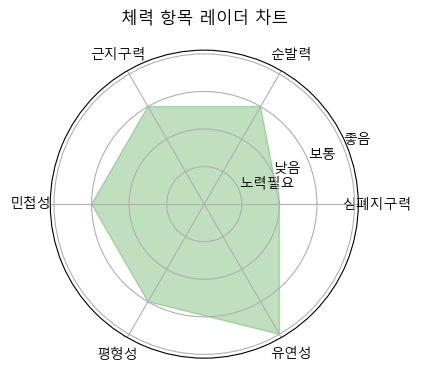

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 기입했을 때 레이더 차트 그려지도록

# 값이 높을수록 좋은 등급인 측정 항목 (~ 이상): 9, 12, 19, 20, 22, 23, 25 
# 값이 낮을수록 좋은 등급인 측정 항목 (~ 이하): 13, 15, 21, 26, 27
positive_rating = ('MESURE_IEM_009_VALUE','MESURE_IEM_012_VALUE','MESURE_IEM_019_VALUE','MESURE_IEM_020_VALUE','MESURE_IEM_022_VALUE','MESURE_IEM_022_VALUE.1','MESURE_IEM_023_VALUE','MESURE_IEM_025_VALUE')
negative_rating = ('MESURE_IEM_013_VALUE','MESURE_IEM_015_VALUE','MESURE_IEM_021_VALUE','MESURE_IEM_026_VALUE','MESURE_IEM_027_VALUE','MESURE_IEM_027_VALUE.1')

def elder_health_estimate(age,gender,value1, value2,value3,value4, value5,*value6):
    data_list = []
    # 기준표 성별,나이 범위 좁히기
    if age>=65:
        data_elder_gender = data_elder_criteria[data_elder_criteria['성별']==gender]
        if age>=85:
            data_age = data_elder_gender[data_elder_gender['나이']=='85~']
        else:
            ranges = [(i, i + 4) for i in range(65, 85, 5)]
            for start, end in ranges:
                #print(start,end)
                if start <= age <= end:
                    #print(start,end)
                    data_age = data_elder_gender[data_elder_gender['나이']==f'{start}~{end}'] 
    
    columns = data_age.columns.tolist()   
    if value6:
        data_list = [value1, value2, value3, value4,value5]
        for value in value6:
            data_list.append(value)
    else:
        data_list = [value1, value2, value3, value4, value5]
    
    
    #행 하나씩 내려가게
    grade_li = []
    for i in range(0, len(data_list)):
        grade_cnt = 0
        grade = 1
        for index, row in data_age.iterrows():
            if columns[i+3] in positive_rating:
                if row[columns[i+3]] <= data_list[i]:
                    if grade<= 5-int(row['등급']):
                        grade = 5- int(row['등급'])
                        grade_li.append(grade)
                    break                        

                else:
                    grade_cnt = grade_cnt +1
                if grade_cnt == 3:
                    grade = 1
                    grade_li.append(grade)
                    #print(grade_li)

            elif columns[i+3] in negative_rating:
                if row[columns[i+3]] >= data_list[i]:
                    if grade<= 5-int(row['등급']):
                        grade = 5-int(row['등급'])
                        grade_li.append(grade)
                        #print(grade_li)
                    break
                else:
                    grade_cnt = grade_cnt +1
                if grade_cnt ==3:
                    grade = 1
                    grade_li.append(grade)
    print(grade_li)
    making_radar_chart(grade_li)

def making_radar_chart(grade_li):
    # 데이터 준비
    values=[]
    num_vars = 0
    categories = []
    print(grade_li)
    if len(grade_li) ==5:
        categories = ['심폐지구력', '순발력', '근지구력', '민첩성', '유연성']
        num_vars = len(grade_li)
        for i in range(len(grade_li)):
            values.append(grade_li[i])

    elif len(grade_li) ==6:
        categories = ['심폐지구력', '순발력', '근지구력', '민첩성', '평형성', '유연성']
        num_vars = len(grade_li)
        for i in range(len(grade_li)):
            values.append(grade_li[i])
    # 각 카테고리의 각도 계산
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    # 첫 번째 요소를 뒤로 복사하여 폐곡선을 만듭니다.
    values += values[:1]
    angles += angles[:1]

    # 레이더 차트 그리기
    plt.rc('font', family='Malgun Gothic')
    fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='green', alpha=0.25)

    # 각 카테고리에 레이블 추가
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    # y축 눈금을 1 단위로 설정
    ax.set_yticks(np.arange(1, 5, 1))
    ax.set_yticklabels(['노력필요', '낮음', '보통','좋음'])

    # 차트 제목
    plt.rc('font', family='Malgun Gothic')
    plt.title('체력 항목 레이더 차트',pad=20)

    # 차트 표시
    plt.show()

elder_health_estimate(83,'여',74,34.1,13,34.1,0.4,5.9)